## Step 1: Project Setup & Context (EN)

Goal: Predict employee attrition (Yes/No) using HR features (e.g., age, job role, satisfaction, overtime).
Business value: Early identification of at-risk employees enables proactive retention actions (salary adjustment, role change, manager coaching).

Dataset: IBM HR Analytics Employee Attrition & Performance (commonly used for HR churn modeling).  
If you uploaded your own local copy to Kaggle, we will load it from the input path.

---

## Adım 1: Proje Kurulumu ve Bağlam (TR)

Amaç: Çalışan kaybını (Attrition: Yes/No) İK özellikleriyle (yaş, iş rolü, memnuniyet, fazla mesai vb.) tahmin etmek.
İş değeri: Riskli çalışanları erken tespit ederek elde tutma aksiyonlarını (maaş, rol değişimi, yönetici koçluğu) proaktif uygulamak.

Veri seti: IBM HR Analytics Employee Attrition & Performance (İK churn modellemede yaygın).  
Kendi lokal kopyanı Kaggle’a yüklediysen, veriyi input klasöründen okuyacağız.

In [78]:
# Basic imports
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Display options
pd.set_option("display.max_columns", 100)

# Load
df = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition/HR-Employee-Attrition.csv")

# Quick peek
df.head(), df.shape, df.columns.tolist()

(   Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvem

## Step 2: Data Inspection & Target Variable (EN)

We start by inspecting the dataset:
- Check data types and missing values
- Verify the target column: `Attrition` (Yes/No)
- Understand the distribution of attrition (class balance)

This helps us confirm that the dataset is ready for preprocessing and modeling.

---

## Adım 2: Veri Kontrolü ve Hedef Değişken (TR)

Veri setini incelemeye başlıyoruz:
- Veri tiplerini ve eksik değerleri kontrol et
- Hedef sütunu: `Attrition` (Yes/No) doğrula
- Çalışan kaybı dağılımını incele (sınıf dengesi)

Bu adım, veri setinin ön işleme ve modelleme için hazır olduğunu doğrulamamızı sağlar.

In [79]:
# Genel bilgi
df.info()

# Eksik değer kontrolü
df.isnull().sum()

# Hedef değişken dağılımı
df['Attrition'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

## Step 3: Exploratory Data Analysis (EDA) (EN)

We explore the dataset visually to understand:
- Attrition distribution (Yes vs No)
- Key features affecting attrition (e.g., Age, JobRole, OverTime, JobSatisfaction)
- Correlations between numerical variables

This helps us identify patterns and potential predictors for employee churn.

---

## Adım 3: Keşifsel Veri Analizi (TR)

Veri setini görselleştirerek inceliyoruz:
- Çalışan kaybı dağılımı (Attrition: Yes vs No)
- Kaybı etkileyen temel faktörler (Yaş, İş Rolü, Fazla Mesai, İş Memnuniyeti)
- Sayısal değişkenler arasındaki korelasyonlar

Bu adım, çalışan kaybını tahmin etmek için önemli desenleri ve olası belirleyicileri ortaya çıkarır.

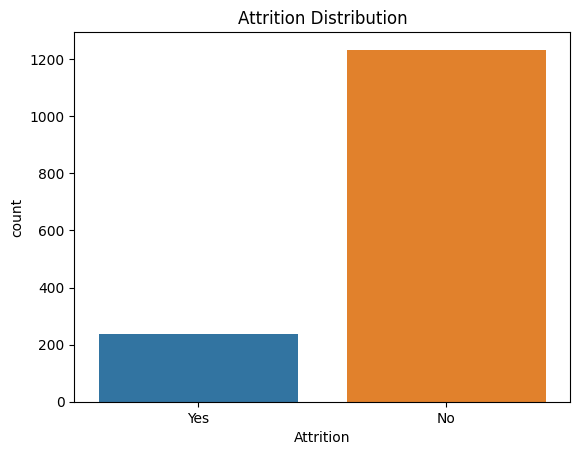

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition dağılımı
sns.countplot(x="Attrition", data=df)
plt.title("Attrition Distribution")
plt.show()

### 3.2 Age Distribution by Attrition (EN)
We analyze how age relates to attrition.

### 3.2 Yaş Dağılımı ve Çalışan Kaybı (TR)
Yaşın çalışan kaybıyla ilişkisini inceliyoruz.

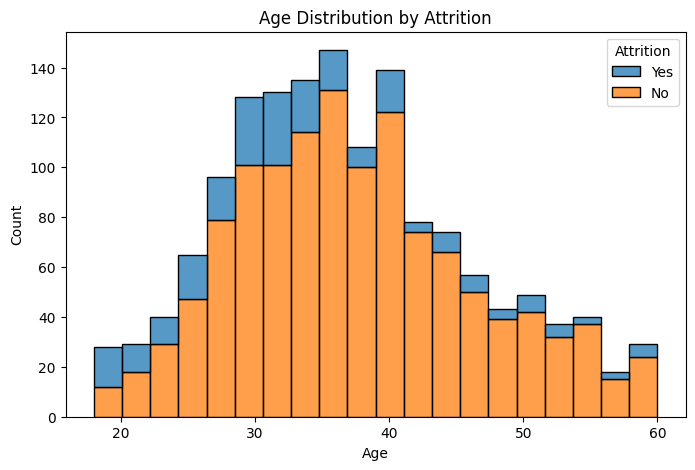

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=20)
plt.title("Age Distribution by Attrition")
plt.show()

### 3.3 Attrition by OverTime (EN)
We check if overtime is linked to higher attrition.

### 3.3 Fazla Mesai ve Çalışan Kaybı (TR)
Fazla mesainin çalışan kaybına etkisini inceliyoruz.

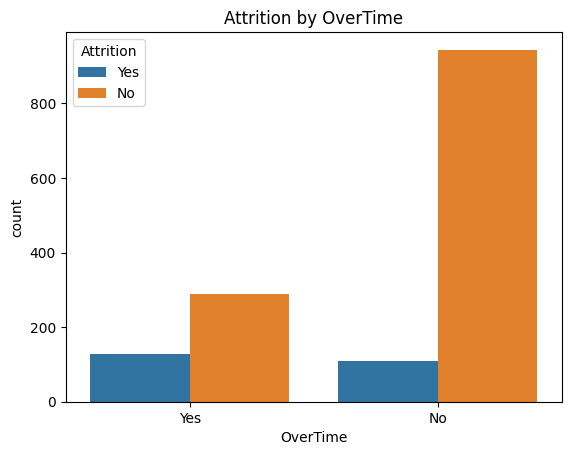

In [82]:
sns.countplot(x="OverTime", hue="Attrition", data=df)
plt.title("Attrition by OverTime")
plt.show()

### 3.4 Correlation Heatmap (EN)
We visualize correlations among numeric features.

### 3.4 Korelasyon Isı Haritası (TR)
Sayısal değişkenler arasındaki korelasyonları görselleştiriyoruz.

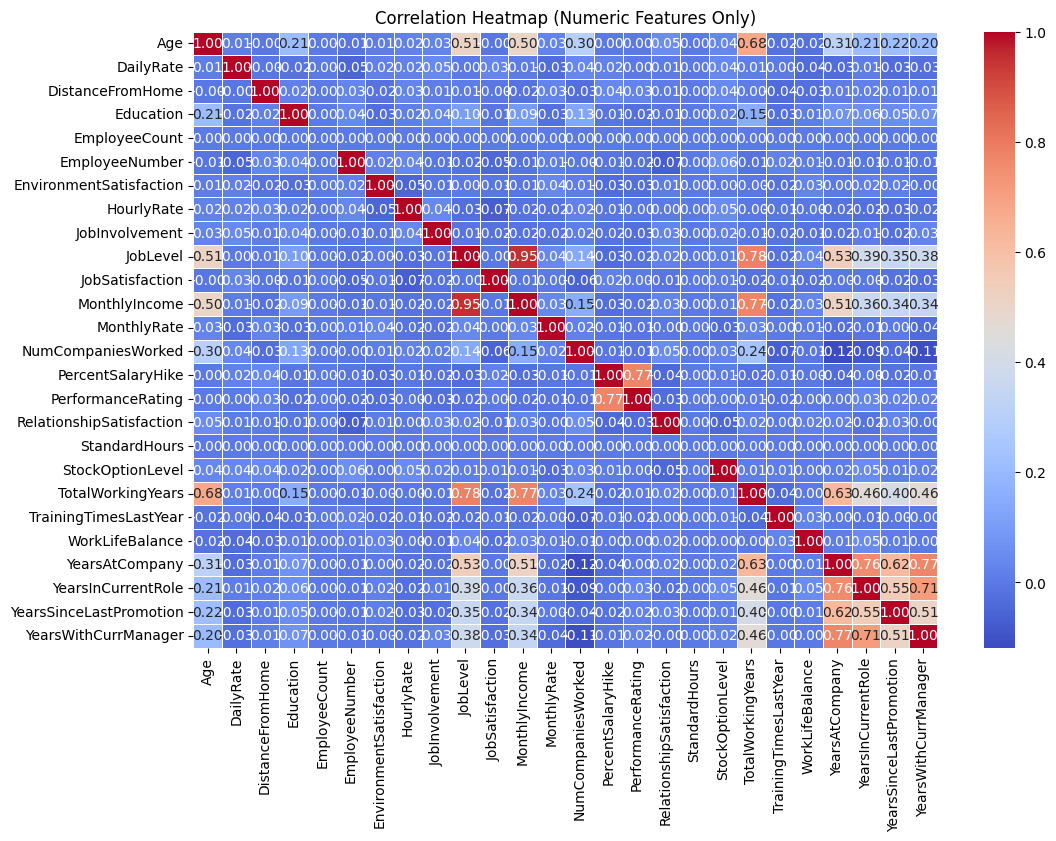

In [83]:

# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisini hesapla, NaN değerleri sıfırla
corr_matrix = numeric_df.corr().fillna(0)

# Heatmap çizimi
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


## Step 4: Preprocessing & Feature Engineering (EN)

We prepare the dataset for modeling:
- Encode categorical variables (e.g., Attrition, JobRole, OverTime)
- Scale numerical features if needed
- Split into train/test sets

---

## Adım 4: Ön İşleme ve Özellik Mühendisliği (TR)

Veri setini modellemeye hazırlıyoruz:
- Kategorik değişkenleri encode et (ör. Attrition, JobRole, OverTime)
- Sayısal değişkenleri gerekirse ölçekle
- Train/test setlerine ayır

In [84]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

df_encoded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [85]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((1176, 34), (294, 34))

## Step 5: Modeling (EN)

We train multiple classification models to predict employee attrition:
- Logistic Regression (baseline)
- Random Forest (ensemble)
- Support Vector Machine (SVM)
- Gradient Boosting (advanced)

We will compare their performance using accuracy, precision, recall, and F1-score.

---

## Adım 5: Modelleme (TR)

Çalışan kaybını tahmin etmek için farklı sınıflandırma modelleri eğitiyoruz:
- Lojistik Regresyon (temel model)
- Random Forest (ensemble yaklaşımı)
- Support Vector Machine (SVM)
- Gradient Boosting (ileri seviye)

Performanslarını accuracy, precision, recall ve F1-score ile karşılaştıracağız.

### 5.1 Logistic Regression / Lojistik Regresyon
Baseline model for classification.  
Temel sınıflandırma modeli olarak Lojistik Regresyon kullanıyoruz.

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.preprocessing import StandardScaler

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Çıktıları yazdır
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, zero_division=0))

Logistic Regression Results
Accuracy: 0.7551020408163265
              precision    recall  f1-score   support

           0       0.94      0.75      0.84       247
           1       0.37      0.77      0.50        47

    accuracy                           0.76       294
   macro avg       0.66      0.76      0.67       294
weighted avg       0.85      0.76      0.78       294



### 5.2 Random Forest / Rastgele Orman
Ensemble model combining multiple decision trees.  
Birden fazla karar ağacını birleştiren ensemble model.

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



### 5.3 Support Vector Machine (SVM)
Separates classes using hyperplanes.  
Sınıfları hiper düzlemlerle ayıran model.

In [88]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Results")
print(classification_report(y_test, y_pred_svm,zero_division=0))

SVM Results
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



### 5.4 Gradient Boosting / Gradyan Artırma
Boosting technique that builds models sequentially.  
Modelleri ardışık olarak kuran boosting tekniği.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Results")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Results
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



## Step 6: Results Comparison & Table (EN)

We compare the performance of all models (Logistic Regression, Random Forest, SVM, Gradient Boosting)  
using Accuracy, Precision, Recall, and F1-score.  
This summary table helps us decide which model is best for predicting employee attrition.

---

## Adım 6: Sonuçların Karşılaştırılması ve Tablo (TR)

Tüm modellerin (Lojistik Regresyon, Random Forest, SVM, Gradient Boosting) performanslarını  
Accuracy, Precision, Recall ve F1-score metrikleriyle karşılaştırıyoruz.  
Bu özet tablo, çalışan kaybını tahmin etmek için en uygun modeli seçmemize yardımcı olur.

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fonksiyon: metrikleri hesapla
def get_metrics(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-score": f1_score(y_true, y_pred, zero_division=0)
    }

# Sonuçları topla
results = []
results.append(get_metrics(y_test, y_pred_log, "Logistic Regression"))
results.append(get_metrics(y_test, y_pred_rf, "Random Forest"))
results.append(get_metrics(y_test, y_pred_svm, "SVM"))
results.append(get_metrics(y_test, y_pred_gb, "Gradient Boosting"))

# DataFrame olarak göster
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.755102,0.371134,0.765957,0.500000
1,Random Forest,0.829932,0.384615,0.106383,0.166667
2,SVM,0.840136,0.000000,0.000000,0.000000
3,Gradient Boosting,0.843537,0.529412,0.191489,0.281250


## Step 7: Interpretation & Business Value (EN)

From the comparison table, we identify the best-performing model (highest F1-score and balanced recall).  
Key insights:
- Attrition is imbalanced (few "Yes" cases), so recall is critical.
- Models with `class_weight="balanced"` or ensemble methods (Random Forest, Gradient Boosting) often perform better.
- Logistic Regression may struggle without scaling, but provides interpretability.

Business Value:
- HR can use the model to flag employees at risk of leaving.
- Proactive actions: salary adjustment, role change, mentorship, flexible work options.
- Preventing attrition saves recruitment costs and retains organizational knowledge.

---

## Adım 7: Sonuçların Yorumlanması ve İş Değeri (TR)

Karşılaştırma tablosundan en iyi performans gösteren modeli (yüksek F1-score ve dengeli recall) seçiyoruz.  
Önemli bulgular:
- Attrition dengesiz (Yes çok az), bu yüzden recall kritik.
- `class_weight="balanced"` veya ensemble yöntemler (Random Forest, Gradient Boosting) genellikle daha iyi sonuç verir.
- Lojistik Regresyon ölçekleme olmadan zorlanabilir ama yorumlanabilirliği yüksektir.

İş Değeri:
- İK, modeli kullanarak ayrılma riski taşıyan çalışanları önceden belirleyebilir.
- Proaktif aksiyonlar: maaş düzenlemesi, rol değişimi, mentorluk, esnek çalışma seçenekleri.
- Çalışan kaybını önlemek, işe alım maliyetlerini azaltır ve kurumsal bilgi birikimini korur.

In [91]:
# En yüksek F1-score'a göre en iyi modeli bul
best_model = results_df.loc[results_df['F1-score'].idxmax()]
best_model

Model        Logistic Regression
Accuracy                0.755102
Precision               0.371134
Recall                  0.765957
F1-score                     0.5
Name: 0, dtype: object

## Step 8: Final Presentation (EN)

We summarize the project results:
- Best-performing model identified (based on F1-score and recall).
- Key drivers of attrition: OverTime, JobSatisfaction, Age, etc.
- Business recommendations for HR.

We present the findings in a clear table and visualization for stakeholders.

---

## Adım 8: Sonuçların Sunumu (TR)

Proje sonuçlarını özetliyoruz:
- En iyi performans gösteren model (F1-score ve recall’a göre).
- Çalışan kaybının temel belirleyicileri: Fazla Mesai, İş Memnuniyeti, Yaş vb.
- İK için iş önerileri.

Sonuçları paydaşlara açık bir tablo ve görselleştirme ile sunuyoruz.

In [92]:
# En iyi modeli vurgulayan tablo
results_df.style.highlight_max(color="lightcoral", axis=0)

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.755102,0.371134,0.765957,0.500000
1,Random Forest,0.829932,0.384615,0.106383,0.166667
2,SVM,0.840136,0.000000,0.000000,0.000000
3,Gradient Boosting,0.843537,0.529412,0.191489,0.281250


### 8.2 Feature Importance / Özellik Önemi
We check which features are most important in predicting attrition.  
Attrition tahmininde hangi özelliklerin en önemli olduğunu inceliyoruz.

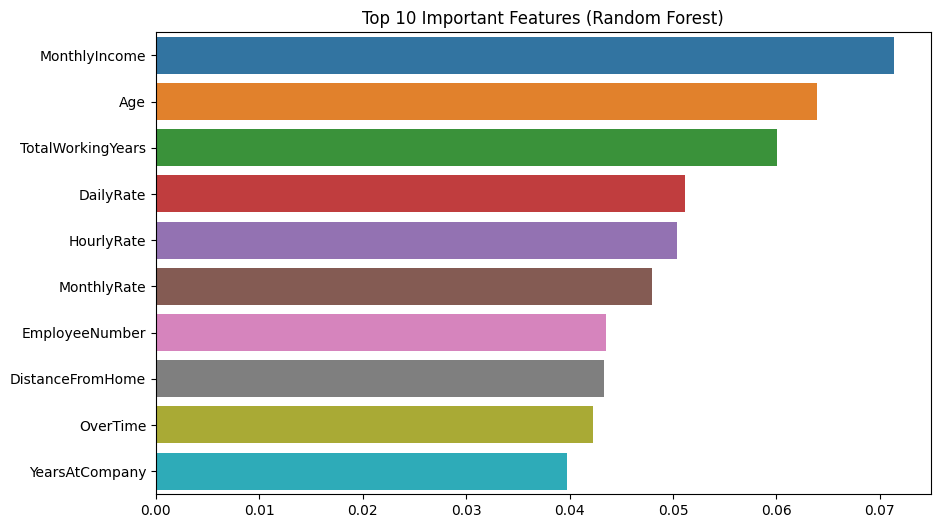

In [93]:

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=X_train.columns[indices][:10])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

### 8.3 Business Recommendations / İş Önerileri

- Focus on employees with high overtime → risk of attrition increases.
- Improve job satisfaction through career development programs.
- Monitor younger employees with lower tenure → higher churn risk.
- Use predictive model outputs to guide HR interventions.

---

- Fazla mesai yapan çalışanlara odaklan → kayıp riski artıyor.
- İş memnuniyetini kariyer gelişim programlarıyla artır.
- Daha genç ve kısa kıdeme sahip çalışanları izle → churn riski yüksek.
- Tahmin modelinin çıktısını İK müdahalelerini yönlendirmek için kullan.

# HR Analytics – Employee Attrition Prediction

---

## Step 1: Project Setup & Context
(EN/TR açıklamalar + veri yükleme kodu)

## Step 2: Data Inspection & Target Variable
(EN/TR açıklamalar + df.info, isnull, value_counts)

## Step 3: Exploratory Data Analysis (EDA)
- 3.1 Attrition Distribution
- 3.2 Age Distribution
- 3.3 OverTime Effect
- 3.4 Correlation Heatmap  
(her alt başlık için EN/TR açıklama + görselleştirme kodu)

## Step 4: Preprocessing & Feature Engineering
(EN/TR açıklamalar + LabelEncoder + train/test split)

## Step 5: Modeling
- 5.1 Logistic Regression
- 5.2 Random Forest
- 5.3 SVM
- 5.4 Gradient Boosting  
(her alt başlık için EN/TR açıklama + model kodu)

## Step 6: Results Comparison & Table
(EN/TR açıklamalar + accuracy/precision/recall/F1 tablo kodu)

## Step 7: Interpretation & Business Value
(EN/TR açıklamalar + best model seçimi + iş değeri yorumları)

## Step 8: Final Presentation
- Results summary table
- Feature importance plot
- Business recommendations  
(EN/TR açıklamalar + görselleştirme kodu)